In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy.interpolate import spline
from sklearn.svm import SVR
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import gaussian_kde
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [1]:
def norm(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))


In [6]:
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

In [16]:
start=0
end=-10
dataframe = pd.read_csv('../data/Apple_Data_300.csv')[start:end]
dataframe.head()


,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted
0,2007-01-03,86.289999,86.579999,81.899999,83.800002,309579900.0,10.857091
1,2007-01-04,84.050001,85.949998,83.820003,85.659998,211815100.0,11.098071
2,2007-01-05,85.770000,86.199997,84.400002,85.049997,208685400.0,11.019039
3,2007-01-08,85.959998,86.529998,85.280003,85.470000,199276700.0,11.073455
4,2007-01-09,86.450003,92.979999,85.150000,92.570003,837324600.0,11.993328


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':


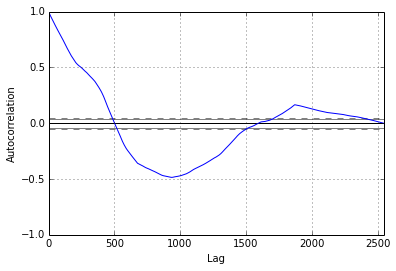

In [20]:
autocorrelation_plot(dataframe.ix[:,4])

In [21]:
### AVALIAR V3 LINHAS
model00 = ARIMA(np.array(dataframe.ix[:,4]), dates=None,order=(2,1,0))
model11 = model00.fit(disp=1)
model11.summary()
model11.forecast()
resid9=model11.resid
np.mean(abs(resid9))/max(np.array(dataframe.ix[:,4]))

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


0.0052642779933344507

In [22]:
x3 = resid9
x3 = x3[numpy.logical_not(numpy.isnan(x3))]
dftest13 = adfuller(x3, autolag='AIC')
dfoutput1 = pd.Series(dftest13[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print('Dickey Fuller Test:\n',dfoutput1)

('Dickey Fuller Test:\n', Test Statistic                  -50.41204
p-value                           0.00000
#Lags Used                        0.00000
Number of Observations Used    2543.00000
dtype: float64)


In [23]:
look_back=200
start=0
end=len(resid9)
lag=look_back
xx=np.array(resid9[start+lag:end])
yy=np.array(resid9[start:end-lag])
autocorrelation=np.corrcoef(xx,yy)
print('Autocorrelation of Residuals=',round(autocorrelation[0][1],3))

('Autocorrelation of Residuals=', 0.0)


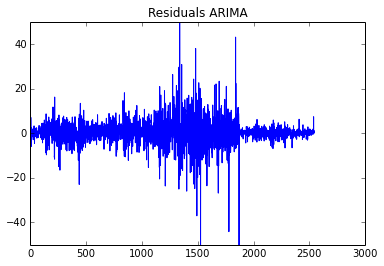

In [24]:
plt.plot(resid9)
plt.title('Residuals ARIMA')
plt.ylim(-50,50)
plt.show()

In [25]:
print(pd.DataFrame(resid9).describe())

                 0
count  2544.000000
mean     -0.000002
std      12.297391
min    -551.863896
25%      -1.859393
50%       0.126612
75%       2.337055
max      49.762840


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.80000000e+01,
          2.47500000e+03]),
 array([-551.86389603, -491.70122243, -431.53854883, -371.37587523,
        -311.21320163, -251.05052803, -190.88785443, -130.72518083,
         -70.56250723,  -10.39983364,   49.76283996]),
 <a list of 10 Patch objects>)

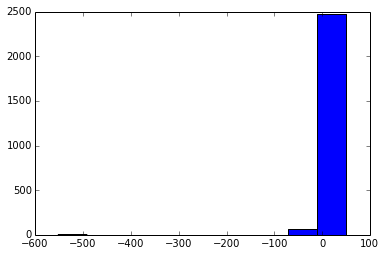

In [26]:
plt.hist(resid9)

In [27]:
density = gaussian_kde(resid9)
xs = np.linspace(-50,50,len(resid9))
density.covariance_factor = lambda : .25
density._compute_covariance()

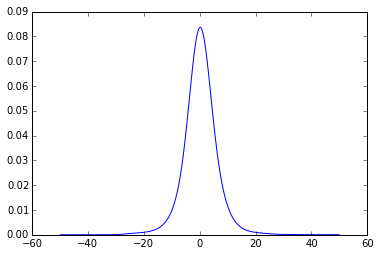

In [28]:
plt.plot(xs,density(xs))
plt.show()

In [29]:
### DELETE OUTLIERS
thre=1.96
delete=np.where(resid9<np.mean(resid9)-thre*np.std(resid9))[0]

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


(array([ 607.,  526.,  286.,  125.,  104.,  199.,  200.,  181.,  231.,   78.]),
 array([  8.84307644,  10.60848581,  12.37389517,  14.13930453,
         15.90471389,  17.67012325,  19.43553261,  21.20094197,
         22.96635133,  24.7317607 ,  26.49717006]),
 <a list of 10 Patch objects>)

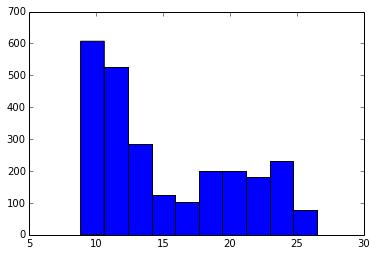

In [30]:
train0=np.delete(np.array(dataframe.ix[:,4]),delete)
train=np.sqrt(train0)


plt.hist(train)

In [31]:
rollmean = pd.rolling_mean(train, window=20)
rollstd = pd.rolling_std(train, window=20)

ts_log0 = np.log(train)
ts_log=pd.DataFrame(ts_log0).dropna()
decomposition = seasonal_decompose(np.array(ts_log).reshape(len(ts_log),),freq=100)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app


In [32]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

z=np.where(seasonal==min(seasonal))[0]
period=z[2]-z[1]

look_back = period

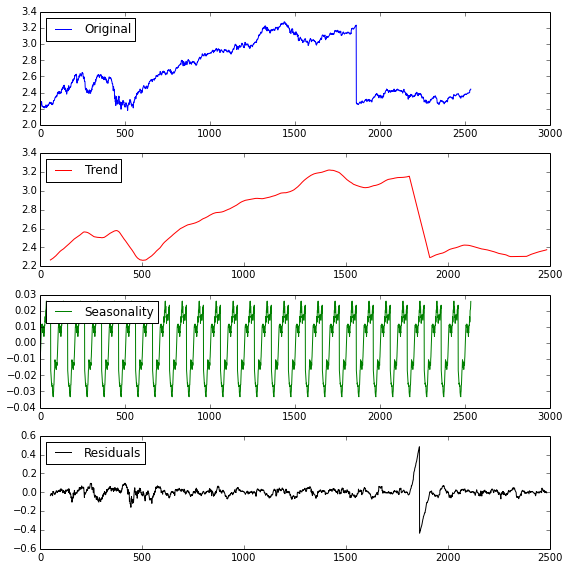

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend',color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals',color='black')
plt.legend(loc='upper left')
plt.tight_layout()

In [36]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(train, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput
# Not stationary

Test Statistic                   -1.818207
p-value                           0.371460
#Lags Used                        0.000000
Number of Observations Used    2536.000000
dtype: float64

In [37]:
x = train0*seasonal
x = x[numpy.logical_not(numpy.isnan(x))]
dftest1 = adfuller(x, autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print('Dickey Fuller Test:\n',dfoutput1)

('Dickey Fuller Test:\n', Test Statistic                -1.206434e+01
p-value                        2.428245e-22
#Lags Used                     2.700000e+01
Number of Observations Used    2.509000e+03
dtype: float64)


In [38]:
train=train0*seasonal
modelP2= ARIMA(np.array(train)[-100:], order=(1,1,0))
model_fit2 = modelP2.fit(disp=-1,tol=1e-28,maxiter=100000)
pred71 = model_fit2.forecast()[0]
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -81.444
Method:                       css-mle   S.D. of innovations              0.551
Date:                Sat, 08 Jul 2017   AIC                            168.888
Time:                        21:05:55   BIC                            176.673
Sample:                             1   HQIC                           172.038
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.056      0.084      0.934      -0.104       0.114
ar.L1.D.y      0.0057      0.101      0.056      0.955      -0.193       0.204
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          174.9637           +0.0000j          174.9637            0.0000
-----------------------------------------------------------------------------
"""

In [39]:

print('Precision=',float(pred71[-1]/(seasonal[-1]*train0[-1])))
print('Error=',100*(1-float(pred71[-1]/(seasonal[-1]*train0[-1]))))
print('Real Stock Value',train[-1]/seasonal[-1])
print('Predicted Stock Value',pred71[-1]/seasonal[-1])

('Precision=', 1.0020509717281558)
('Error=', -0.2050971728155826)
('Real Stock Value', 132.41999799999999)
('Predicted Stock Value', 132.69158767214046)


In [40]:
train=train0*seasonal


In [41]:
x = train0*seasonal
x = x[numpy.logical_not(numpy.isnan(x))]
dftest1 = adfuller(x, autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print('Dickey Fuller Test:\n',dfoutput1)

('Dickey Fuller Test:\n', Test Statistic                -1.206434e+01
p-value                        2.428245e-22
#Lags Used                     2.700000e+01
Number of Observations Used    2.509000e+03
dtype: float64)


In [42]:
for i in range(0,10):
    if i<2:
        modelP2= ARIMA(np.array(train)[-100:], order=(1,1,0))
        model_fit2 = modelP2.fit(disp=-1,tol=1e-28,maxiter=100000)
        pred71 = model_fit2.forecast()[0]
        new=np.concatenate((train,pred71),axis=0)
        train=new
    else:
        modelP2= ARIMA(np.array(train)[-100:], order=(1,1,0))
        model_fit2 = modelP2.fit(disp=-1,tol=1e-28,maxiter=100000)
        pred71 = model_fit2.forecast()[0]
        new=np.concatenate((train,pred71),axis=0)
        train=new

In [46]:
predicted=train/seasonal[-1]
predicted_ok=predicted[-11:]
dataframe3 = pd.read_csv('../data/Apple_Data_300.csv')
real_data=np.array(dataframe3.ix[end:end+10,4])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


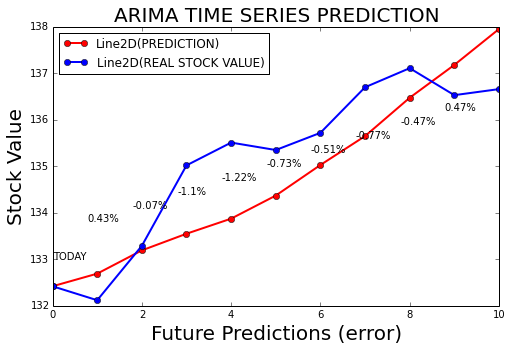

In [47]:
plt.figure(figsize=(8,5))
line1,=plt.plot(predicted_ok,marker='o',linewidth=2,color='red',label='PREDICTION')
line2,=plt.plot(real_data,marker='o',linewidth=2,color='blue',label='REAL STOCK VALUE')
plt.annotate('TODAY',(0,133))
for i in range(1,10):
    plt.annotate('{0}%'.format(round(100*(1-(real_data/predicted_ok))[i],2)),(i-.2,133.5+.3*i))
plt.title('ARIMA TIME SERIES PREDICTION',fontsize=20)
plt.ylabel('Stock Value',fontsize=20)
plt.xlabel('Future Predictions (error)',fontsize=20)
plt.legend([line1,line2],loc='upper left')
plt.show()

In [48]:
print('Mean error:',100*np.mean(abs(real_data-predicted_ok))/real_data[-1],'percent')

('Mean error:', 0.603692162605873, 'percent')
